### MIRI Toy dataset

In [8]:
import sys
import os
import torch
from src.imputer_wrapper import impute_now
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import argparse
import torch.nn as nn
import torch.optim as optim


### Generating Dataset

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
import zipfile

n = 1000 # paper uses 6000, but 1000 is enough for demo
d = 2
p = 0.7
seed = 1

dset = "toy"
torch.manual_seed(seed)

methods = ['miri', 'mice', 'knewimp'] # paper uses hyperimpute, but here uses mice for a faster demo. You can replave it with hyperimpute
print("methods: ", methods)

def sample_ref(n):
    # unzip dset.zip to dset.pt
    with zipfile.ZipFile("./data/%s.zip" % dset, 'r') as zip_ref:
        zip_ref.extractall("./data/")
    
    Xdata = torch.load("./data/%s.pt" % dset, map_location=device)
    X = Xdata[:n, :].detach().clone()
    Xstar = X.detach().clone()
    
    M = torch.distributions.bernoulli.Bernoulli(torch.ones(n, d)*p).sample().to(device)
    X[M==0] = torch.randn(n, d).to(device)[M==0]
    
    return X.cpu(), M.cpu(), Xstar.cpu()

X0, M, Xstar = sample_ref(n)
print("Data size", "n: ", X0.shape[0], "d: ", X0.shape[1], "p: ", p)
print("Missing rate: ", 1 - M.mean().item())
print("------------ The tests begins now ------------ \n ")

methods:  ['miri', 'mice', 'knewimp']
Data size n:  1000 d:  2 p:  0.7
Missing rate:  0.30400002002716064
------------ The tests begins now ------------ 
 


### Running Imputation Methods

In [ ]:
for method in methods:
    X_tilde, mmd_list, mi_list = impute_now(X0, M, Xstar, method, max_rounds=10)
    torch.save([X_tilde, mmd_list, mi_list], "res/toy_0_%s.pt" % method)


Using miri imputer Tests are OK!
n: 1000, d: 2, batchsize: 100
round: 1, mmd: 0.02118
Estimating mutual information ...


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 95.95it/s]


mi: 0.7537788152694702
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 40.05it/s]


Finished round: 1 / 10, time: 1.7806196212768555

round: 2, mmd: 0.00172
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 95.92it/s]


mi: 0.14071229100227356
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 41.77it/s]


Finished round: 2 / 10, time: 1.7946877479553223

round: 3, mmd: 0.00097
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 95.85it/s]


mi: 0.10671639442443848
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 40.30it/s]


Finished round: 3 / 10, time: 1.7979710102081299

round: 4, mmd: 0.00012
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 96.55it/s]


mi: 0.06503079831600189
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 41.46it/s]


Finished round: 4 / 10, time: 1.7862694263458252

round: 5, mmd: 0.00014
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 97.08it/s]


mi: 0.04579487442970276
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 42.16it/s]


Finished round: 5 / 10, time: 1.7750060558319092

round: 6, mmd: 0.00017
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 96.62it/s]


mi: -0.007148131728172302
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 41.78it/s]


Finished round: 6 / 10, time: 1.7779390811920166

round: 7, mmd: 0.00033
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 96.34it/s]


mi: 0.06889158487319946
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 41.40it/s]


Finished round: 7 / 10, time: 1.8052053451538086

round: 8, mmd: 0.00031
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 96.38it/s]


mi: 0.0524294376373291
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 41.05it/s]


Finished round: 8 / 10, time: 1.796271800994873

round: 9, mmd: 0.00041
Estimating mutual information ...


100%|██████████| 100/100 [00:01<00:00, 94.14it/s]


mi: 0.055097877979278564
Training vector field ...


100%|██████████| 2/2 [00:00<00:00, 38.65it/s]


Finished round: 9 / 10, time: 1.8131392002105713

round: 10, mmd: 0.00042
Estimating mutual information ...


  0%|          | 0/100 [00:00<?, ?it/s]

### Plotting Results

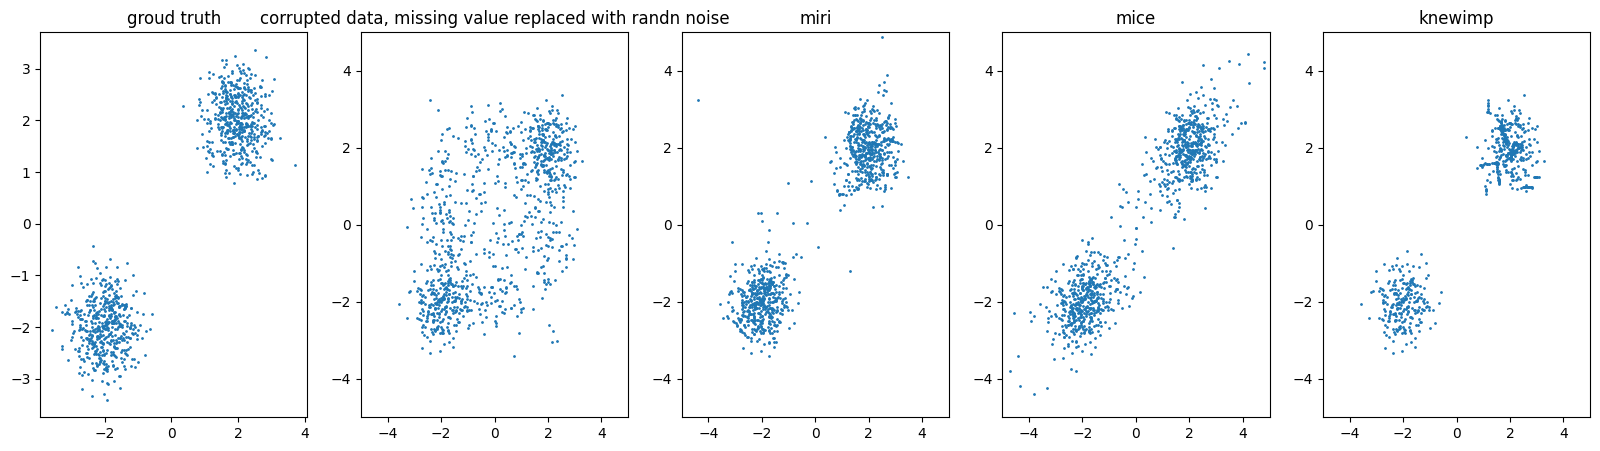

In [ ]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.scatter(Xstar[:, 0].cpu(), Xstar[:, 1].cpu(), s = 1)
plt.title("groud truth")

plt.subplot(1, 5, 2)
plt.scatter(X0[:, 0].detach().cpu(), X0[:, 1].detach().cpu(), s = 1)
plt.xlim(-5, 5); plt.ylim(-5, 5)
plt.title("corrupted data, missing value replaced with randn noise")

for method in methods:
    X_tilde, mmd_list, mi_list = torch.load("res/toy_0_%s.pt" % method)
    X = X_tilde.detach().cpu()
    plt.subplot(1, 5, methods.index(method) + 3)
    plt.scatter(X[:, 0], X[:, 1], s = 1)
    plt.xlim(-5, 5); plt.ylim(-5, 5)
    plt.title(method)

plt.show()



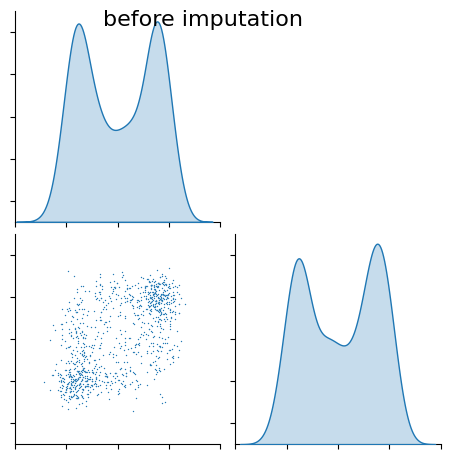

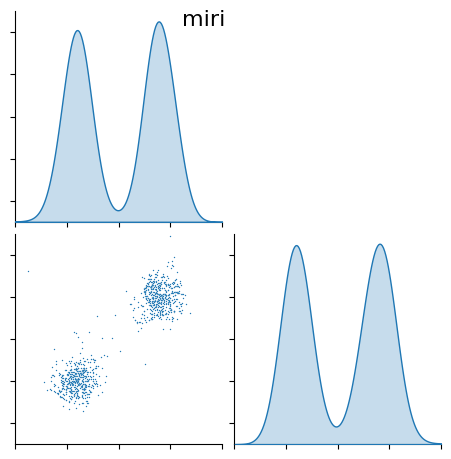

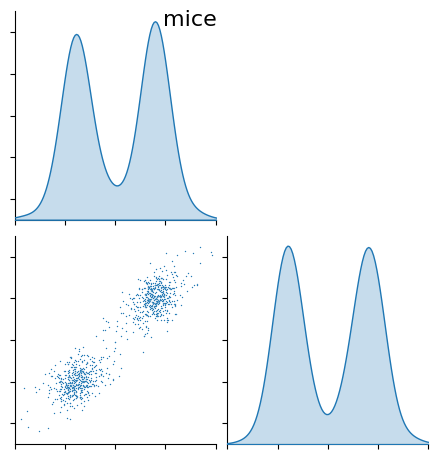

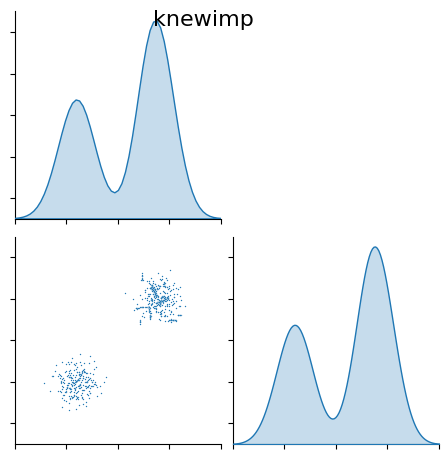

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X0.detach().cpu().numpy()[:, :2], columns=["x1", "x2"])
pairplot = sns.pairplot(df, diag_kind="kde", markers="o", plot_kws={"s": 1})

for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
    pairplot.axes[i, j].set_visible(False)
    
pairplot.set(xlim=(-5, 5), ylim=(-5, 5))
pairplot.set(xticklabels=[], yticklabels=[])
pairplot.set(xlabel=None, ylabel=None)
# add title to the plot 
pairplot.fig.suptitle("before imputation", fontsize=16)
plt.show()

for method in methods:
    X_tilde, mmd_list, mi_list = torch.load("res/toy_0_%s.pt" % method)
    df = pd.DataFrame(X_tilde.detach().cpu().numpy()[:, :2], columns=["x1", "x2"])
    pairplot = sns.pairplot(df, diag_kind="kde", markers="o", plot_kws={"s": 1})

    for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
        pairplot.axes[i, j].set_visible(False)
        
    pairplot.set(xlim=(-5, 5), ylim=(-5, 5))
    pairplot.set(xticklabels=[], yticklabels=[])
    pairplot.set(xlabel=None, ylabel=None)
    pairplot.fig.suptitle(method, fontsize=16)
    plt.show()
